In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# Neural network modeules
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("C:\\Users\\satya\\git\\Pathhole\\machine-learning-repos\\Covid-19 prediction using ML\\Dataset\\corona_tested_individuals_ver_006.english.csv")


C:\Users\satya\AppData\Local\Temp\ipykernel_14852\1634645434.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\satya\\git\\Pathhole\\machine-learning-repos\\Covid-19 prediction using ML\\Dataset\\corona_tested_individuals_ver_006.english.csv")


In [3]:
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
50490,2020-04-23,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
276543,2020-03-15,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
210992,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other
5592,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
131321,2020-04-13,0.0,0.0,0.0,0.0,0.0,negative,Yes,male,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [5]:
df['test_indication'].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [6]:
df.isnull().mean() * 100

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000359
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

In [7]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [8]:
df.shape

(278847, 10)

In [9]:
df.duplicated().sum()

272207

In [10]:
# Working with test_date column
# Converting to datetime datatype
df['test_date'] = pd.to_datetime(df['test_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278847 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            278847 non-null  datetime64[ns]
 1   cough                278596 non-null  float64       
 2   fever                278596 non-null  float64       
 3   sore_throat          278847 non-null  float64       
 4   shortness_of_breath  278847 non-null  float64       
 5   head_ache            278847 non-null  float64       
 6   corona_result        278847 non-null  object        
 7   age_60_and_above     151528 non-null  object        
 8   gender               259285 non-null  object        
 9   test_indication      278847 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 23.4+ MB


In [12]:
df['test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
230649,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March
66674,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April
82774,2020-04-19,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other,April
68396,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April
269447,2020-03-19,0.0,0.0,0.0,0.0,0.0,negative,No,NaN,Other,March


In [13]:
df['test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
220525,2020-03-30,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,30
108374,2020-04-16,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,16
65082,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,21
162268,2020-04-08,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,April,8
199176,2020-04-02,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,2


## Univariate Analysis

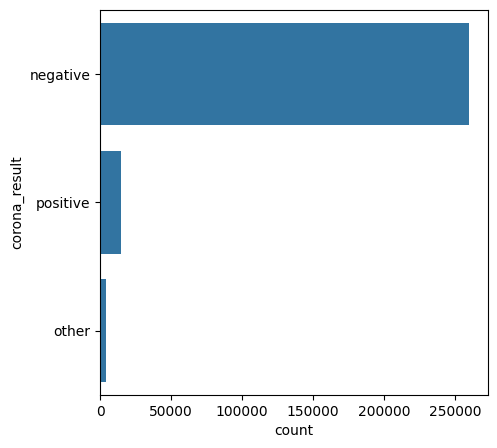

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df['corona_result'])
plt.show()

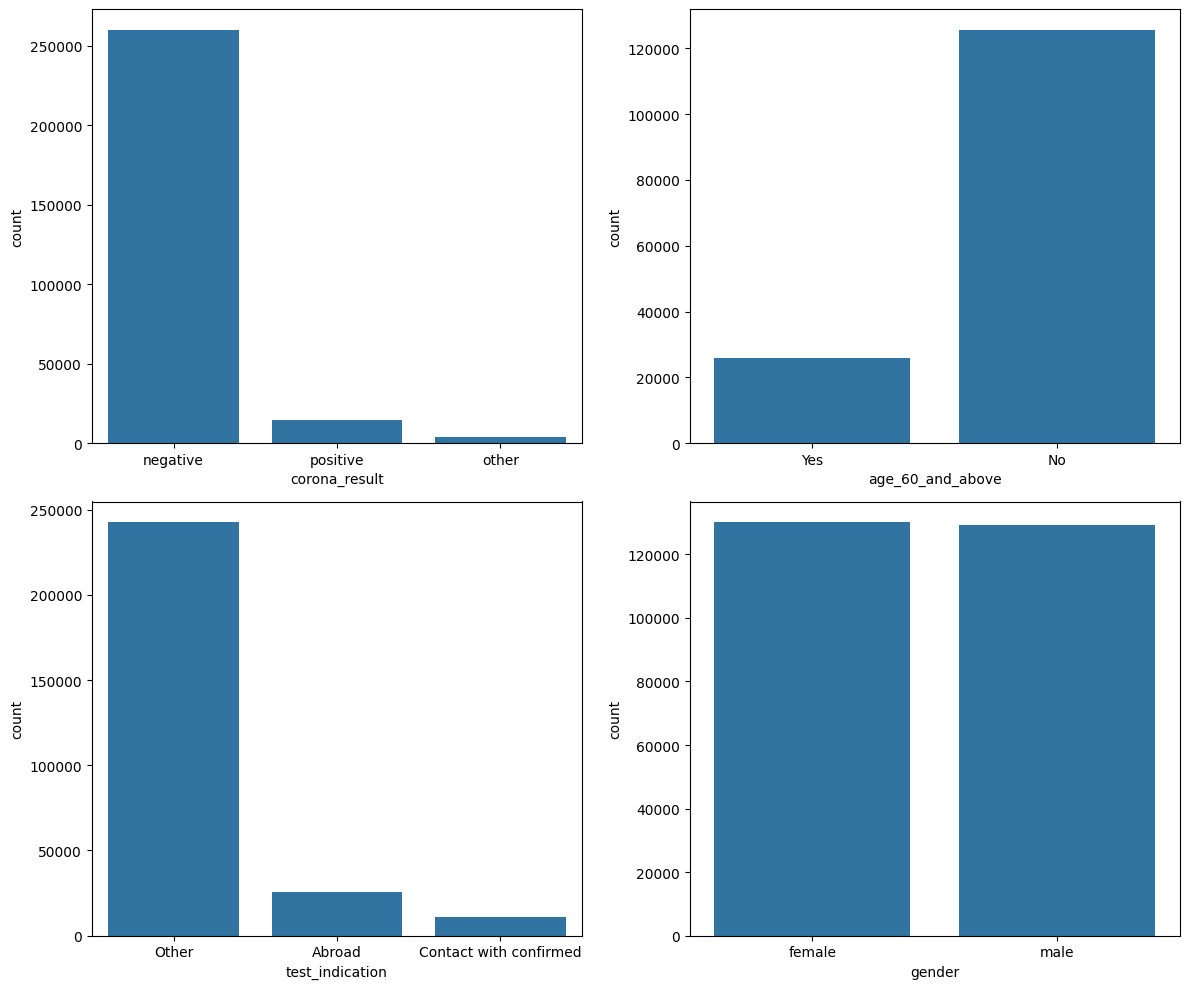

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot for Column1
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

# Plot for Column2
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

# Plot for Column3
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

# Plot for Column4
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

# Show plot
plt.tight_layout()
plt.show()

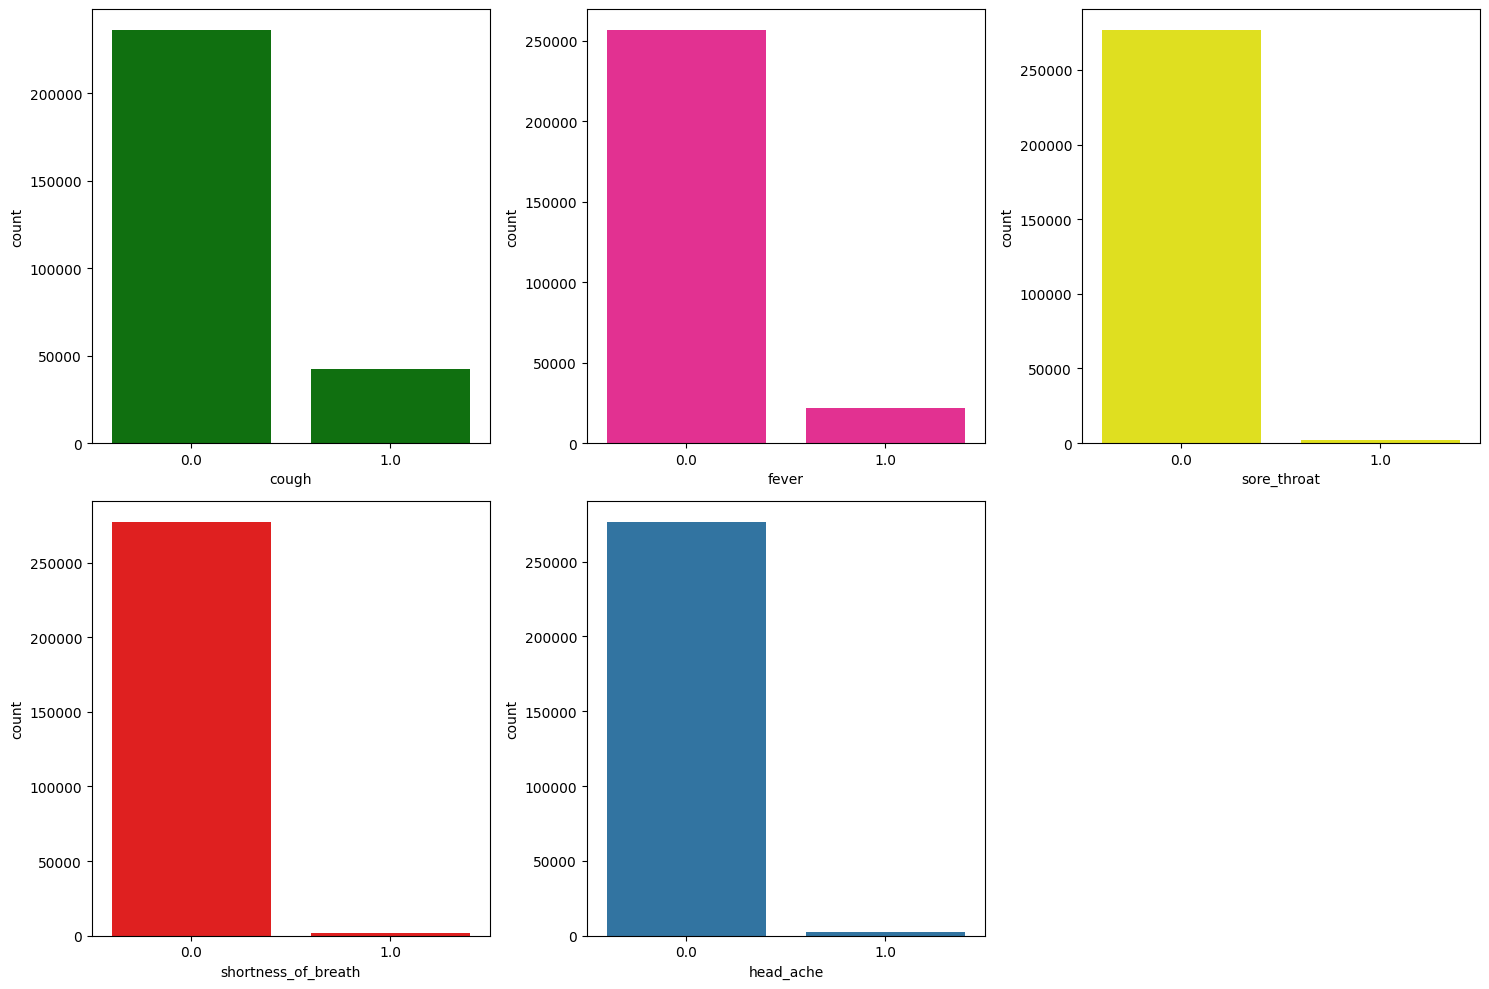

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')

# Plot for Column2
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

# Plot for Column3
plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')

# Plot for Column4
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

# Plot for Column5
plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

# Show plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

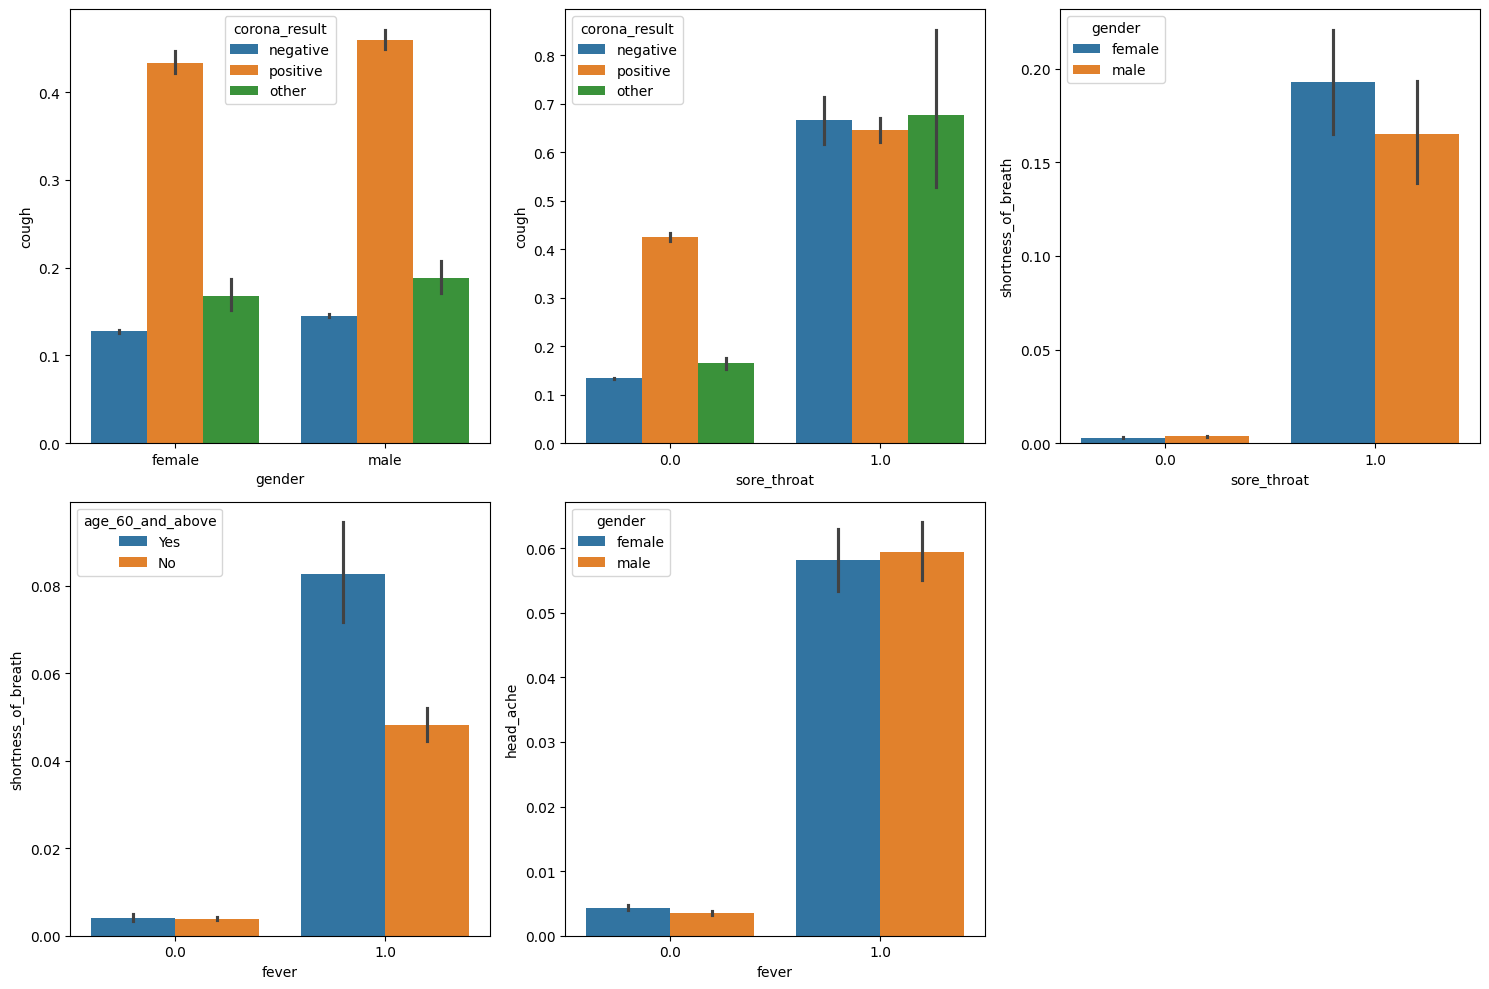

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='gender', y='cough' ,hue=df['corona_result'])

# Plot for Column2
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='sore_throat', y='cough' ,hue=df['corona_result'])

# Plot for Column3
plt.subplot(2, 3, 3)
sns.barplot(data=df ,x='sore_throat', y='shortness_of_breath', hue=df['gender'])

# Plot for Column4
plt.subplot(2, 3, 4)
sns.barplot(data=df ,x='fever', y='shortness_of_breath', hue=df['age_60_and_above'])

# Plot for Column5
plt.subplot(2, 3, 5)
sns.barplot(data=df ,x='fever', y='head_ache', hue=df['gender'])

# Show plot
plt.tight_layout()
plt.show()

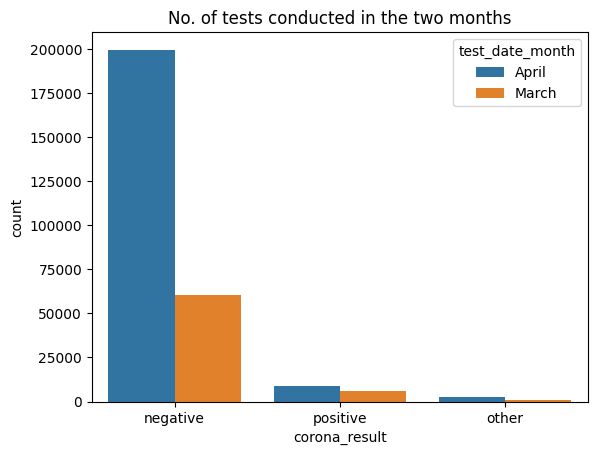

In [18]:
plt.title("No. of tests conducted in the two months")
sns.countplot(data=df, x='corona_result', hue='test_date_month')
plt.show()

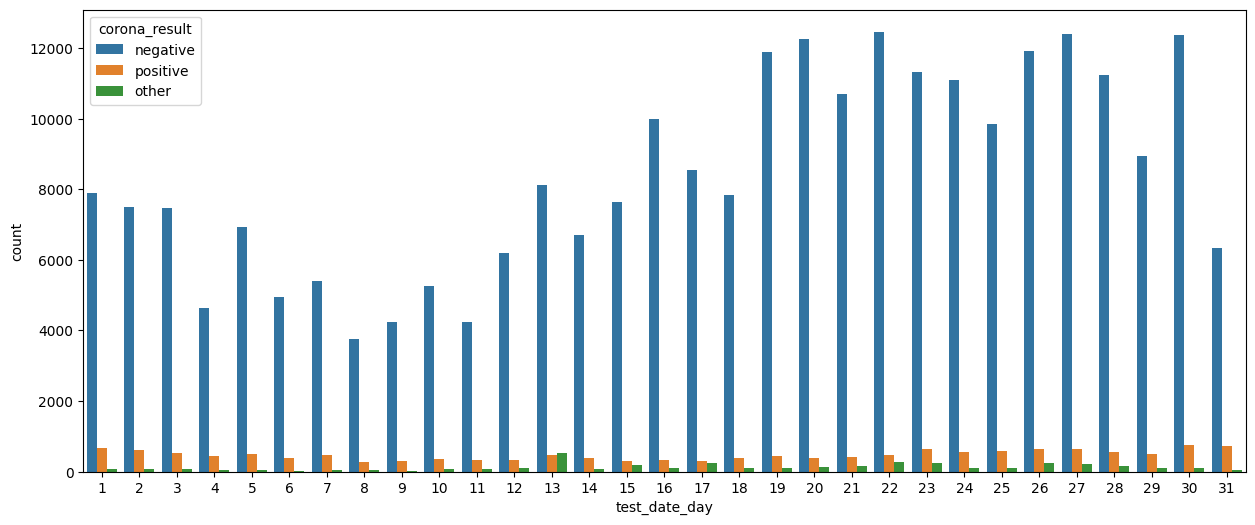

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

## Train test split

In [20]:
from sklearn.model_selection import train_test_split

X = df
y = df['corona_result']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
95011,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
149262,2020-04-10,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,10
170331,2020-04-06,1.0,0.0,0.0,0.0,0.0,negative,No,male,Abroad,April,6
21499,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,27
234875,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,28
...,...,...,...,...,...,...,...,...,...,...,...,...
33867,2020-04-25,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,25
84434,2020-04-19,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
95816,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
203245,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,1


## Handling Missing data

In [23]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [24]:
X_train.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day,age_60_and_above_imputed,gender_imputed
271918,2020-03-18,0.0,0.0,0.0,0.0,0.0,negative,No,NaN,Other,March,18,No,NaN
147348,2020-04-11,0.0,0.0,0.0,0.0,0.0,negative,No,female,Abroad,April,11,No,female
12133,2020-04-28,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other,April,28,NaN,male
151182,2020-04-10,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,10,No,male
277901,2020-03-13,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other,March,13,NaN,NaN


In [25]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum()).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum()).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum()).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum()).values

C:\Users\satya\AppData\Local\Temp\ipykernel_14852\1606487958.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(

In [26]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [27]:
temp

,original,imputed
No,0.829225,0.829722
Yes,0.170775,0.170278


In [28]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
female,0.502439,0.401604
male,0.497561,0.398394


In [29]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

C:\Users\satya\AppData\Local\Temp\ipykernel_14852\3394986770.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).

In [30]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values

C:\Users\satya\AppData\Local\Temp\ipykernel_14852\4294878389.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).

In [31]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)

In [32]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)

In [33]:
X_train.drop('corona_result', axis=1, inplace=True)
X_test.drop('corona_result', axis=1, inplace=True)

In [34]:
X_train.isnull().mean() * 100

test_date              0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
test_indication        0.0
test_date_month        0.0
test_date_day          0.0
age_60_and_above       0.0
gender                 0.0
cough                  0.0
fever                  0.0
dtype: float64

## Encoding on categorical columns

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [36]:
le.classes_

array(['negative', 'other', 'positive'], dtype=object)

In [37]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [38]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['age_60_and_above','gender','test_indication','test_date_month'])
],remainder='passthrough')

In [40]:
# Fit and transform on the training data
X_train_encoded = transformer.fit_transform(X_train)

# Transform the test data
X_test_encoded = transformer.transform(X_test)

In [41]:
# Convert the transformed training data array to a DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out())

# Convert the transformed test data array to a DataFrame
X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out())

In [42]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [43]:
X_test.isnull().mean()*100

tnf1__age_60_and_above_Yes                      0.0
tnf1__gender_male                               0.0
tnf1__test_indication_Contact with confirmed    0.0
tnf1__test_indication_Other                     0.0
tnf1__test_date_month_March                     0.0
remainder__sore_throat                          0.0
remainder__shortness_of_breath                  0.0
remainder__head_ache                            0.0
remainder__test_date_day                        0.0
remainder__cough                                0.0
remainder__fever                                0.0
dtype: float64

In [44]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [45]:
# Convert target data to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(223077, 3)

In [46]:
# Define the new learning rate
new_learning_rate = 0.002196  # Update with your desired learning rate

# Create an optimizer with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)

In [47]:
model=Sequential()
model.add(Dense(128,input_dim=11,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dense(416,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(352,activation='relu'))
model.add(Dense(480,activation='relu'))
model.add(Dense(160,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 416)            │        13,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        13,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 352)            │        22,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 480)            │       169,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 160)            │        76,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,611 (1.16 MB)

 Trainable params: 304,611 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(X_train,y_train,validation_data= (X_test, y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - accuracy: 0.9465 - loss: 0.2105 - val_accuracy: 0.9554 - val_loss: 0.1831
Epoch 2/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - accuracy: 0.9554 - loss: 0.1787 - val_accuracy: 0.9519 - val_loss: 0.1837
Epoch 3/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9547 - loss: 0.1834 - val_accuracy: 0.9547 - val_loss: 0.1825
Epoch 4/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9551 - loss: 0.1788 - val_accuracy: 0.9544 - val_loss: 0.1832
Epoch 5/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 92s 8ms/step - accuracy: 0.9563 - loss: 0.1765 - val_accuracy: 0.9548 - val_loss: 0.1786
Epoch 6/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9555 - loss: 0.1788 - val_accuracy: 0.9557 - val_loss: 0.1797
Epoch 7/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9561 - loss: 0.1775 - val_accuracy: 0.9554 - val_loss: 0.1778
Epoch 8/10
11154/11154 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - accuracy: 

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

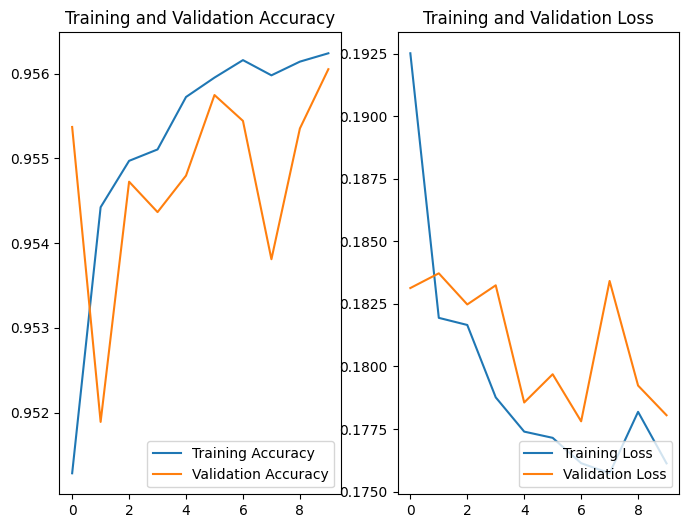

In [51]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test)

1743/1743 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute and print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.00      0.00      0.00       808
           2       0.78      0.60      0.68      2938

    accuracy                           0.96     55770
   macro avg       0.58      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770



c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

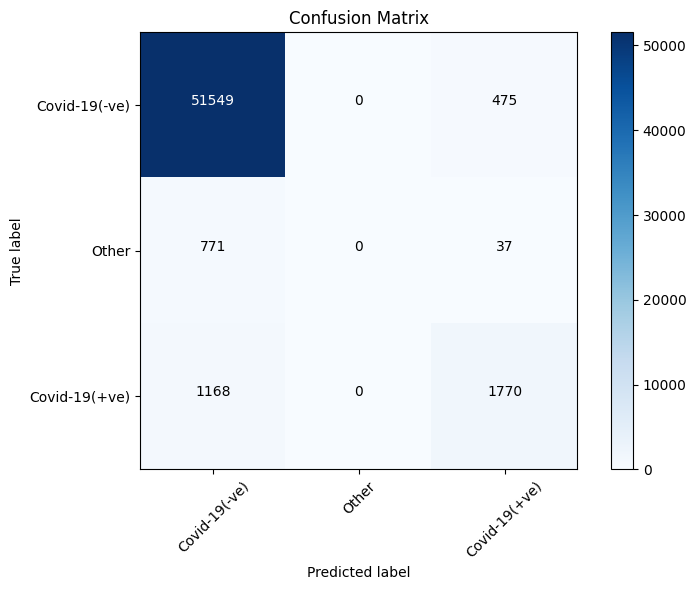

In [54]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Covid-19(-ve)', 'Other', 'Covid-19(+ve)']  # Update with your actual class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

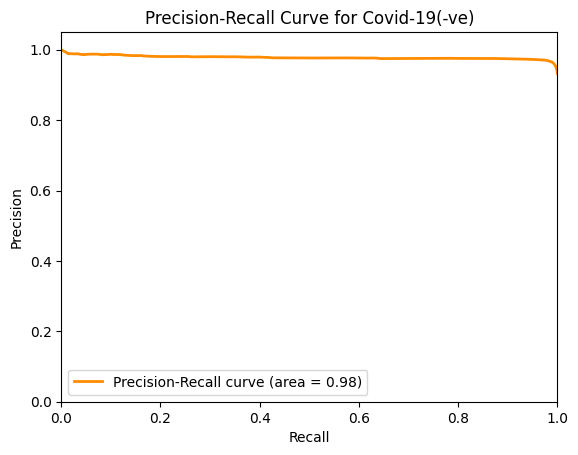

In [55]:
from sklearn.metrics import precision_recall_curve, auc

# Extracting probabilities for class 0
y_test_class_0 = y_test[:, 0]
y_pred_class_0 = y_pred[:, 0]

# Compute Precision-Recall curve and Precision-Recall area for class 0
precision, recall, _ = precision_recall_curve(y_test_class_0, y_pred_class_0)
pr_auc = auc(recall, precision)

# Plotting Precision-Recall curve for class 0
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Covid-19(-ve)')
plt.legend(loc="lower left")
plt.show()

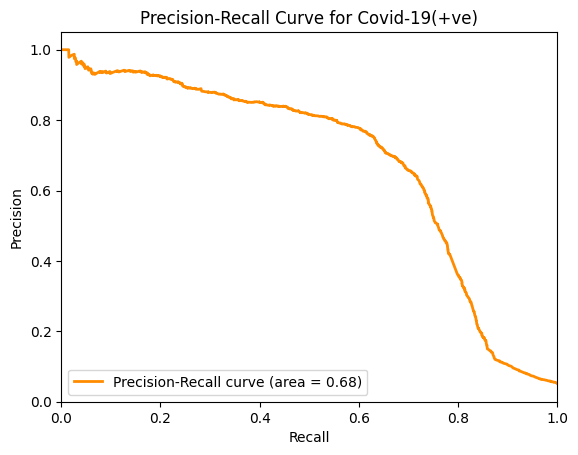

In [56]:
# Extracting probabilities for class 2
y_test_class_0 = y_test[:, 2]
y_pred_class_0 = y_pred[:, 2]

# Compute Precision-Recall curve and Precision-Recall area for class 0
precision, recall, _ = precision_recall_curve(y_test_class_0, y_pred_class_0)
pr_auc = auc(recall, precision)

# Plotting Precision-Recall curve for class 0
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Covid-19(+ve)')
plt.legend(loc="lower left")
plt.show()

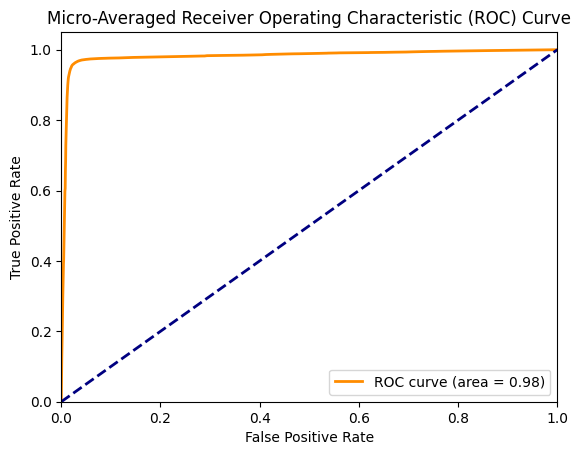

In [57]:
# Assuming 'y_test' is the true labels for the test set
# Assuming 'y_test' contains the true labels for all three classes (0, 1, and 2)

# Compute micro-averaged ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Plotting micro-averaged ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
pip install keras-tuner



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from keras import layers
import keras_tuner

In [60]:
def build_model(hp):
    model = keras.Sequential()
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(7, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_1, built=False>

In [61]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="/content/drive/MyDrive/Jitendra Sir ML Project",
    project_name="/content/drive/MyDrive/Jitendra Sir ML Project/my_dir",
)

In [62]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Set hyperparameters for Trial 2
num_layers = 2
units = [480, 64]  # Assuming 'units' for each layer
activation = 'tanh'
dropout = True
dropout_rate = 0.0024302
learning_rate = 0.0024302

def build_model():
    model = Sequential()
    
    # Add layers according to the fixed hyperparameters
    for i in range(num_layers):
        model.add(Dense(units=units[i], activation=activation))
        if dropout:
            model.add(Dropout(rate=dropout_rate))
    
    # Final layer should match the number of classes
    num_classes = 3  # Adjust based on your dataset
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
                  metrics=['accuracy'])
    
    return model

# Build and compile the model with the fixed hyperparameters
model = build_model()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9467 - loss: 0.2081 - val_accuracy: 0.9526 - val_loss: 0.1947
Epoch 2/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9516 - loss: 0.1921 - val_accuracy: 0.9499 - val_loss: 0.1932
Epoch 3/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9511 - loss: 0.1901 - val_accuracy: 0.9507 - val_loss: 0.1882
Epoch 4/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9525 - loss: 0.1878 - val_accuracy: 0.9530 - val_loss: 0.1848
Epoch 5/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9532 - loss: 0.1868 - val_accuracy: 0.9547 - val_loss: 0.1860
Epoch 6/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9537 - loss: 0.1865 - val_accuracy: 0.9530 - val_loss: 0.1874
Epoch 7/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9537 - loss: 0.1843 - val_accuracy: 0.9534 - val_loss: 0.1883
Epoch 8/10
6972/6972 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9536 - loss: 0

In [64]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/Jitendra Sir ML Project/my_dir
Showing 10 best trials
Objective(name="val_accuracy", direction="max")
